# Import libraries

Import necessary libraries

In [ ]:
#!pip install tensorflow==2.15.0
import os
import subprocess
import tensorflow as tf
import keras
from keras import datasets, layers, models, losses
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

# Helpers

In [ ]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

In [ ]:
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

# Model


Define the keras model for Lenet5

In [ ]:
import os
import subprocess
import tensorflow as tf
import keras
from keras import datasets, layers, models, losses
import numpy as np
@keras.saving.register_keras_serializable(package="Lenet", name="Lenet")
class Lenet(tf.keras.Model):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.conv1 = self._make_conv_layer(6, 5, input_shape=[32, 32, 1])
    self.conv2 = self._make_conv_layer(16, 5)
    self.conv3 = self._make_conv_layer(120, 5, pooling=False, flatten=True)
    self.dense1 = layers.Dense(84, activation='tanh')
    self.dense2 = layers.Dense(10, activation='softmax')

  def call(self, inputs, dense_inputs=tf.zeros((1,120))):
    x = self.conv1(inputs)
    x = self.conv2(x)
    conv_res = self.conv3(x)
    dense_out = self.dense2(self.dense1(dense_inputs))
    dense1 = self.dense1(conv_res)
    out = self.dense2(dense1)
    return {'out': out, 'out_dense': dense_out}

  def _make_conv_layer(self, filters, kernel_size, input_shape=None, pooling=True, flatten=False):
    l = keras.Sequential()
    if input_shape is not None:
      l.add(layers.Conv2D(filters, kernel_size, activation='tanh', input_shape=input_shape))
    else:
      l.add(layers.Conv2D(filters, kernel_size, activation='tanh'))
    if pooling:
      l.add(layers.AveragePooling2D(2))
      l.add(layers.Activation('sigmoid'))
    if flatten:
      l.add(layers.Flatten())
    return l

  def get_config(self):
    config = super().get_config()
    config.update({
        "conv1": keras.saving.serialize_keras_object(self.conv1),
        "conv2": keras.saving.serialize_keras_object(self.conv2),
        "conv3": keras.saving.serialize_keras_object(self.conv3),
        "dense1": keras.saving.serialize_keras_object(self.dense1),
        "dense2": keras.saving.serialize_keras_object(self.dense2)
    })
    return config



# Data

## Preprocessing

Build the dataset. Images need to be in floating point format, so the values are divided by 255. They are also padded so that height and width are a power of 2.

11490434/11490434 [==============================] - 2s 0us/step


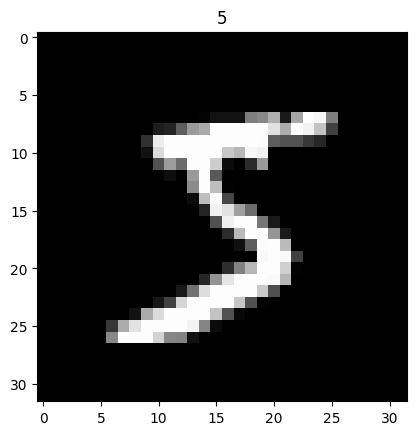

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train = tf.pad(x_train, [[0, 0], [2, 2], [2, 2]]) / 255
x_test = tf.pad(x_test, [[0, 0], [2, 2], [2, 2]]) / 255
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)

import matplotlib.pyplot as plt

# Print the first 10 images
for i in range(1):
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.show()

# Select an image
image = x_train[0]

# Convert the image to bytes
image_bytes = bytes(image)

# Convert the bytes to hex
image_hex = ' '.join(format(byte, '02x') for byte in image_bytes)

#print(image_hex)
with open('image_grey.hex', 'w') as f:
    f.write(image_hex)

Take some images for the validation set

In [ ]:
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

## Build

In [ ]:
model = Lenet()
model(x_train[0][None,:,:,:], tf.ones((1,120)))
model.summary()

Model: "lenet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 14, 14, 6)         156       
                                                                 
 sequential_1 (Sequential)   (1, 5, 5, 16)             2416      
                                                                 
 sequential_2 (Sequential)   (1, 120)                  48120     
                                                                 
 dense (Dense)               multiple                  10164     
                                                                 
 dense_1 (Dense)             multiple                  850       
                                                                 
Total params: 61706 (241.04 KB)
Trainable params: 61706 (241.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Train

In [ ]:
EPOCHS = 5
BATCH_SIZE = 128

model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_val, y_val))
model.save('lenet5.keras')

Epoch 1/5
454/454 [==============================] - 7s 5ms/step - loss: 1.9327 - accuracy: 0.2848 - val_loss: 0.5252 - val_accuracy: 0.8705
Epoch 2/5
454/454 [==============================] - 2s 4ms/step - loss: 0.4610 - accuracy: 0.8572 - val_loss: 0.2364 - val_accuracy: 0.9335
Epoch 3/5
454/454 [==============================] - 2s 5ms/step - loss: 0.3208 - accuracy: 0.8997 - val_loss: 0.1986 - val_accuracy: 0.9420
Epoch 4/5
454/454 [==============================] - 2s 4ms/step - loss: 0.2651 - accuracy: 0.9167 - val_loss: 0.2093 - val_accuracy: 0.9360
Epoch 5/5
454/454 [==============================] - 2s 5ms/step - loss: 0.2337 - accuracy: 0.9274 - val_loss: 0.1476 - val_accuracy: 0.9600


Get dimension of .keras trained model

In [ ]:
convert_bytes(get_file_size("lenet5.keras"), "KB")

File size: 771.019 Kilobytes


In [ ]:
model.load_weights('lenet5.keras')
model.predict(x_train[0][None,:,:,:])

1/1 [==============================] - 1s 808ms/step


{'out': array([[4.8833364e-04, 8.0063578e-04, 7.0460519e-04, 2.7555346e-01,
         6.7719259e-07, 7.1977901e-01, 9.9687782e-08, 1.1022899e-03,
         1.2780941e-03, 2.9276474e-04]], dtype=float32),
 'out_dense': array([[0.09420101, 0.09051015, 0.11445776, 0.10434542, 0.09869833,
         0.11275383, 0.08072697, 0.09569866, 0.10742386, 0.10118403]],
       dtype=float32)}

In [ ]:
@tf.function(
    input_signature=[tf.TensorSpec(shape=[1, 28, 28, 6], dtype=tf.float32)]
)
def activation_conv1(x):
  out = tf.math.tanh(x)
  out = tf.nn.avg_pool(out, ksize=2, strides=2, padding='VALID')
  k = tf.math.sigmoid(out)
  k = tf.nn.tanh(k)
  return k

@tf.function(
    input_signature=[tf.TensorSpec(shape=[1, 10, 10, 16], dtype=tf.float32)]
)
def activation_conv2(x):
  out = tf.math.tanh(x)
  out = tf.nn.avg_pool(out, ksize=2, strides=2, padding='VALID')
  k = tf.math.sigmoid(out)
  k = tf.nn.tanh(k)
  return k

@tf.function(
    input_signature=[tf.TensorSpec(shape=[1, 1, 1, 120], dtype=tf.float32)]
)
def activation_conv3(x):
  out = tf.math.tanh(x)
  k = tf.nn.tanh(out)
  return k

@tf.function(
    input_signature=[tf.TensorSpec(shape=[1, 84], dtype=tf.float32)]
)
def activation_dense1(x):
  out = tf.math.tanh(x)
  return out

@tf.function(
    input_signature=[tf.TensorSpec(shape=[1, 10], dtype=tf.float32)]
)
def activation_dense2(x):
  out = tf.nn.softmax(x)
  return out

def representative_dataset():
  for data in tf.data.Dataset.from_tensor_slices((x_train)).batch(1).take(1000):
    yield [data]

activations = {
    "activation_conv1": activation_conv1,
    "activation_conv2": activation_conv2,
    "activation_conv3": activation_conv3,
    "activation_dense1": activation_dense1,
    "activation_dense2": activation_dense2,
}

for layer_name, activation in activations.items():
  converter = tf.lite.TFLiteConverter.from_concrete_functions([activation.get_concrete_function()])
  converter.optimizations = [tf.lite.Optimize.DEFAULT] # Recommended optimization
  converter.representative_dataset = representative_dataset
 # Specify that the quantized model should only support int8 operations
  converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
  converter.inference_input_type = tf.int32
  converter.inference_output_type = tf.int8

  tflite_quant_model = converter.convert()

  with open(f'{layer_name}.tflite', 'wb') as f:
    f.write(tflite_quant_model)

ValueError: The inference_input_type and inference_output_type must be in ['tf.float32', 'tf.int8', 'tf.uint8'].

In [ ]:
import tensorflow as tf
tf.lite.experimental.Analyzer.analyze(model_path="lenet5_edited.tflite")
interpreter = tf.lite.Interpreter(model_path="lenet5_edited.tflite")
interpreter.allocate_tensors()
# Get names of input and output
interpreter.get_tensor_details()[22]

=== lenet5_edited.tflite ===

Your TFLite model has '1' subgraph(s). In the subgraph description below,
T# represents the Tensor numbers. For example, in Subgraph#0, the FULLY_CONNECTED op takes
tensor #1 and tensor #14 and tensor #12 as input and produces tensor #15 as output.

Subgraph#0 main(T#0, T#1) -> [T#33, T#18]
  Op#0 FULLY_CONNECTED(T#1, T#14, T#12[-815, -67, -347, 943, -314, ...]) -> [T#15]
  Op#1 TANH(T#15) -> [T#16]
  Op#2 FULLY_CONNECTED(T#16, T#11, T#9[-79, -1298, 2288, -174, 493, ...]) -> [T#17]
  Op#3 SOFTMAX(T#17) -> [T#18]
  Op#4 CONV_2D(T#0, T#8, T#7[-28847, 16208, -15145, -21816, 15629, ...]) -> [T#19]
  Op#5 TANH(T#19) -> [T#20]
  Op#6 AVERAGE_POOL_2D(T#20) -> [T#21]
  Op#7 LOGISTIC(T#21) -> [T#22]
  Op#8 CONV_2D(T#22, T#6, T#5[271, 453, -12072, -13127, -44, ...]) -> [T#23]
  Op#9 TANH(T#23) -> [T#24]
  Op#10 AVERAGE_POOL_2D(T#24) -> [T#25]
  Op#11 LOGISTIC(T#25) -> [T#26]
  Op#12 CONV_2D(T#26, T#4, T#3[-103, -1609, -72, -528, -311, ...]) -> [T#27]
  Op#13 TANH(T#

{'name': 'lenet_21/sequential_61/activation_40/Sigmoid',
 'index': 22,
 'shape': array([ 1, 14, 14,  6], dtype=int32),
 'shape_signature': array([-1, 14, 14,  6], dtype=int32),
 'dtype': numpy.int8,
 'quantization': (0.00390625, -128),
 'quantization_parameters': {'scales': array([0.00390625], dtype=float32),
  'zero_points': array([-128], dtype=int32),
  'quantized_dimension': 0},
 'sparsity_parameters': {}}

## Quantization

In [ ]:
# Tensorflow Lite needs a representative dataset in order to determine the correct quantization parameters
def representative_dataset():
  for data in tf.data.Dataset.from_tensor_slices((x_train)).batch(1).take(1000):
    yield [data]


converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT] # Recommended optimization
converter.representative_dataset = representative_dataset
# Specify that the quantized model should only support int8 operations
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

tflite_quant_model = converter.convert()

with open('lenet5_mnist.tflite', 'wb') as f:
  f.write(tflite_quant_model)


/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:953: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


AttributeError: 'Lenet' object has no attribute 'conv_out'

Get dimension of .tflite trained and converted model

In [ ]:
convert_bytes(get_file_size("lenet5_mnist.tflite"), "KB")

File size: 69.805 Kilobytes


## Model Analysis

### TF Lite Analyzer
Analyze the model to get details about tensors and operations used in the inference

In [ ]:
tf.lite.experimental.Analyzer.analyze("activation_conv1_edit.tflite")
interpreter = tf.lite.Interpreter(model_path="activation_conv1_edit.tflite")
interpreter.allocate_tensors()
# Get names of input and output
interpreter.get_tensor_details()

=== activation_conv1_edit.tflite ===

Your TFLite model has '1' subgraph(s). In the subgraph description below,
T# represents the Tensor numbers. For example, in Subgraph#0, the TANH op takes
tensor #0 as input and produces tensor #1 as output.

Subgraph#0 main(T#0) -> [T#3]
  Op#0 TANH(T#0) -> [T#1]
  Op#1 AVERAGE_POOL_2D(T#1) -> [T#2]
  Op#2 LOGISTIC(T#2) -> [T#3]

Tensors of Subgraph#0
  T#0(x) shape:[1, 28, 28, 6], type:INT8
  T#1(Tanh) shape:[1, 28, 28, 6], type:INT8
  T#2(AvgPool) shape:[1, 14, 14, 6], type:INT8
  T#3(Identity) shape:[1, 14, 14, 6], type:INT8

---------------------------------------------------------------
              Model size:       1144 bytes
    Non-data buffer size:       1040 bytes (90.91 %)
  Total data buffer size:        104 bytes (09.09 %)
    (Zero value buffers):          0 bytes (00.00 %)

* Buffers of TFLite model are mostly used for constant tensors.
  And zero value buffers are buffers filled with zeros.
  Non-data buffers area are used to stor

[{'name': 'x',
  'index': 0,
  'shape': array([ 1, 28, 28,  6], dtype=int32),
  'shape_signature': array([ 1, 28, 28,  6], dtype=int32),
  'dtype': numpy.int8,
  'quantization': (0.05561614781618118, -12),
  'quantization_parameters': {'scales': array([0.05561615], dtype=float32),
   'zero_points': array([-12], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'Tanh',
  'index': 1,
  'shape': array([ 1, 28, 28,  6], dtype=int32),
  'shape_signature': array([ 1, 28, 28,  6], dtype=int32),
  'dtype': numpy.int8,
  'quantization': (0.0078125, 0),
  'quantization_parameters': {'scales': array([0.0078125], dtype=float32),
   'zero_points': array([0], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'AvgPool',
  'index': 2,
  'shape': array([ 1, 14, 14,  6], dtype=int32),
  'shape_signature': array([ 1, 14, 14,  6], dtype=int32),
  'dtype': numpy.int8,
  'quantization': (0.0078125, 0),
  'quantization_parameters': {'scales'

###Netron
As an alternative https://netron.app could be exploited to get a more user-friendly and schematic view of the .tflite model

Build the Tensorflow Lite interpreter

In [ ]:
interpreter = tf.lite.Interpreter('lenet5_mnist.tflite', experimental_preserve_all_tensors=True)
interpreter.allocate_tensors()
sig = interpreter.get_signature_runner()
# Get names of input and output
interpreter.get_signature_list()

{'serving_default': {'inputs': ['input_1'], 'outputs': ['output_1']}}

###Output Tensor Analysis

Get the output tensor's details

In [ ]:
interpreter.get_signature_list()

{'serving_default': {'inputs': ['args_0', 'args_1'],
  'outputs': ['out', 'out_dense']}}

In [ ]:
interpreter.get_input_details()

[{'name': 'serving_default_args_0:0',
  'index': 0,
  'shape': array([ 1, 32, 32,  1], dtype=int32),
  'shape_signature': array([-1, 32, 32,  1], dtype=int32),
  'dtype': numpy.int8,
  'quantization': (0.003921568859368563, -128),
  'quantization_parameters': {'scales': array([0.00392157], dtype=float32),
   'zero_points': array([-128], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'serving_default_args_1:0',
  'index': 1,
  'shape': array([  1, 120], dtype=int32),
  'shape_signature': array([ -1, 120], dtype=int32),
  'dtype': numpy.int8,
  'quantization': (0.006880663800984621, 3),
  'quantization_parameters': {'scales': array([0.00688066], dtype=float32),
   'zero_points': array([3], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [ ]:
first_layer_kernel = interpreter.get_tensor(11).astype(np.int8)
#import struct
#first_layer_kernel[0,:,:,0].tobytes().hex()
first_layer_kernel[0]

array([[[ -73],
        [ -33],
        [  25],
        [  26],
        [  45]],

       [[ -28],
        [  62],
        [  82],
        [ 118],
        [  85]],

       [[   3],
        [  55],
        [ 127],
        [ 117],
        [  76]],

       [[ -66],
        [  56],
        [  99],
        [  39],
        [   0]],

       [[-108],
        [ -33],
        [ -67],
        [ -96],
        [-109]]], dtype=int8)

In [ ]:
interpreter = tf.lite.Interpreter(model_path="lenet5_mnist.tflite", experimental_preserve_all_tensors=True)
interpreter_edited = tf.lite.Interpreter(model_path="lenet5_edited.tflite")

tf.lite.experimental.Analyzer.analyze(model_path="lenet5_edited.tflite")
tf.lite.experimental.Analyzer.analyze(model_path="lenet5_mnist.tflite")

interpreter.get_tensor_details()

=== lenet5_edited.tflite ===

Your TFLite model has '1' subgraph(s). In the subgraph description below,
T# represents the Tensor numbers. For example, in Subgraph#0, the FULLY_CONNECTED op takes
tensor #1 and tensor #14 and tensor #12 as input and produces tensor #15 as output.

Subgraph#0 main(T#0, T#1) -> [T#33, T#18]
  Op#0 FULLY_CONNECTED(T#1, T#14, T#12[-815, -67, -347, 943, -314, ...]) -> [T#15]
  Op#1 TANH(T#15) -> [T#16]
  Op#2 FULLY_CONNECTED(T#16, T#11, T#9[-79, -1298, 2288, -174, 493, ...]) -> [T#17]
  Op#3 SOFTMAX(T#17) -> [T#18]
  Op#4 CONV_2D(T#0, T#8, T#7[-28847, 16208, -15145, -21816, 15629, ...]) -> [T#19]
  Op#5 TANH(T#19) -> [T#20]
  Op#6 AVERAGE_POOL_2D(T#20) -> [T#21]
  Op#7 LOGISTIC(T#21) -> [T#22]
  Op#8 CONV_2D(T#22, T#6, T#5[271, 453, -12072, -13127, -44, ...]) -> [T#23]
  Op#9 TANH(T#23) -> [T#24]
  Op#10 AVERAGE_POOL_2D(T#24) -> [T#25]
  Op#11 LOGISTIC(T#25) -> [T#26]
  Op#12 CONV_2D(T#26, T#4, T#3[-103, -1609, -72, -528, -311, ...]) -> [T#27]
  Op#13 TANH(T#

[{'name': 'serving_default_input_1:0',
  'index': 0,
  'shape': array([ 1, 32, 32,  1], dtype=int32),
  'shape_signature': array([-1, 32, 32,  1], dtype=int32),
  'dtype': numpy.int8,
  'quantization': (0.003921568859368563, -128),
  'quantization_parameters': {'scales': array([0.00392157], dtype=float32),
   'zero_points': array([-128], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'lenet/sequential_2/flatten/Const',
  'index': 1,
  'shape': array([2], dtype=int32),
  'shape_signature': array([2], dtype=int32),
  'dtype': numpy.int32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'lenet/dense_1/BiasAdd/ReadVariableOp',
  'index': 2,
  'shape': array([10], dtype=int32),
  'shape_signature': array([10], dtype=int32),
  'dtype': numpy.int32,
  'quantization': (3.7200734368525445e-05, 0),
  'qu

In [ ]:
interpreter_edited.get_tensor_details()

[{'name': 'serving_default_args_0:0',
  'index': 0,
  'shape': array([ 1, 32, 32,  1], dtype=int32),
  'shape_signature': array([-1, 32, 32,  1], dtype=int32),
  'dtype': numpy.int8,
  'quantization': (0.003921568859368563, -128),
  'quantization_parameters': {'scales': array([0.00392157], dtype=float32),
   'zero_points': array([-128], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'serving_default_args_1:0',
  'index': 1,
  'shape': array([  1, 120], dtype=int32),
  'shape_signature': array([ -1, 120], dtype=int32),
  'dtype': numpy.int8,
  'quantization': (0.0078125, 0),
  'quantization_parameters': {'scales': array([0.0078125], dtype=float32),
   'zero_points': array([0], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'lenet_21/sequential_63/flatten_20/Const',
  'index': 2,
  'shape': array([2], dtype=int32),
  'shape_signature': array([2], dtype=int32),
  'dtype': numpy.int32,
  'quantization': (0.0, 0),
  '

###Input Tensor Analysis

In [ ]:
input_details = interpreter.get_input_details()[0]
input_scale, input_zero_point = input_details["quantization"]
print(f"Input scale: {input_scale}")
print(f"Zero point: {input_zero_point}")

sig = interpreter.get_signature_runner()
interpreter.get_signature_list()
sig(args_0=tf.ones((1,32,32,1), tf.int8), args_1=tf.ones((1,120), tf.int8))

Input scale: 0.003921568859368563
Zero point: -128


{'out': array([[-118, -128,  -67,  -36, -128, -119, -128, -128,  -45, -127]],
       dtype=int8),
 'out_dense': array([[-105, -101,  -94, -105, -108,  -94,  -98, -114,  -94, -110]],
       dtype=int8)}

##Accuracy

Quantize the validation set and cast to int8, then calculate accuracy

In [ ]:
quantized_val = tf.cast(x_val / input_scale + input_zero_point, tf.int8)
outputs = sig(input_1=quantized_val)['output_1']
quantized_pred = tf.argmax(outputs, axis=1)
print("Quantized model accuracy on validation set: {:.02f}".format((tf.math.count_nonzero(quantized_pred == y_val) / 2000) * 100))

Quantized model accuracy on validation set: 95.80


##Save tensor as an array of bytes

Save a Tensor in binary format

In [ ]:
image = quantized_val[0]
with open('image.bin', 'wb') as f:
  f.write(bytearray(image))

Generate the array of char from the .bin file

In [ ]:
command = ["xxd", "-i", 'image.bin']
input_file_name = 'image.bin'
output_file_name = 'image_input.h'

with open(output_file_name, "w") as outfile:
    result = subprocess.run(command, stdout=outfile, text=True)

    if result.returncode == 0:
        print(f"Header file '{output_file_name}' generated successfully.")
    else:
        print("Error generating header file.")

Header file 'image_input.h' generated successfully.


# Get Golden Output with a given input image

{'out': <tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.09999989, 0.10000001, 0.10000007, 0.10000016, 0.09999985,
        0.09999989, 0.09999941, 0.10000043, 0.10000008, 0.10000022]],
      dtype=float32)>, 'out_dense': <tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.09420101, 0.09051015, 0.11445776, 0.10434542, 0.09869833,
        0.11275383, 0.08072697, 0.09569866, 0.10742386, 0.10118403]],
      dtype=float32)>}
[[-105 -102 -102 -102 -102 -102 -102 -102 -102 -102]]
[[-102 -102 -104 -102 -102 -102 -102 -104 -102 -102]]
{'out': <tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[7.7119657e-05, 8.4893960e-01, 1.2776609e-02, 2.4631536e-03,
        1.7322188e-02, 1.3093193e-03, 2.1620376e-02, 9.2544287e-02,
        2.5923742e-04, 2.6881429e-03]], dtype=float32)>, 'out_dense': <tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.09420101, 0.09051015, 0.11445776, 0.10434542, 0.09869833,
        0.11275383, 0.08072697, 0.09569866, 0.10742386, 0.10118403]],
 

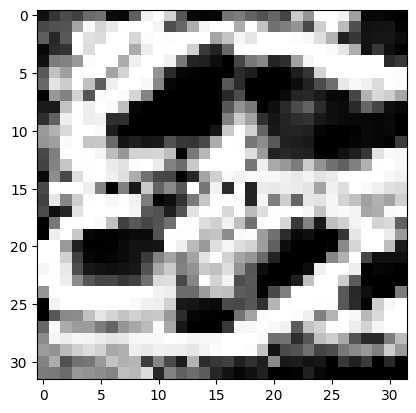

inference output data: [[0.08984375 0.1015625  0.1015625  0.1015625  0.1015625  0.1015625
  0.1015625  0.1015625  0.1015625  0.1015625 ]]
.npy file content: [[0.08984375 0.1015625  0.1015625  0.1015625  0.1015625  0.1015625
  0.1015625  0.1015625  0.1015625  0.1015625 ]]


In [ ]:
import numpy as np
import tensorflow as tf
import keras
from PIL import Image
import json

# ----------- Quantized model inference -------------
interpreter = tf.lite.Interpreter(model_path="lenet5_edited.tflite", experimental_preserve_all_tensors=True)
interpreter_edited = tf.lite.Interpreter(model_path="lenet5_edited.tflite")
interpreter.allocate_tensors()
in_scale, in_zero_point = interpreter.get_input_details()[0]["quantization"]
out_scale, out_zero_point = interpreter.get_output_details()[0]["quantization"]
# ---------- END Quantized model inference -----------
# --------- NOT Quantized model inference ------------
"""
model = tf.keras.models.load_model("lenet5.keras", custom_objects={"Lenet": Lenet})
in_zero_point = 128
in_scale = 0.003921568859368563
out_scale = 0.00390625
out_zero_point = 128
"""
# -------- END NOT Quantized model inference ---------

def read_png_input_image():
  input_img = np.load("input_image_float32.npy")
  input_img = np.expand_dims(input_img, axis=0)

  print(model(input_img))

def check_patterns(image):
  coords = [(15,9),(15,10),(15,11),(15,12),(15,13),(15,14),(15,15),(15,16),(15,17),(15,18),(14,10),(13,11),(12,12),(11,18),(12,18),(13,18),(14,18),(16,18),(17,18),(18,18),(19,18)]
  hex_values = ['49', 'e4', '0a', 'd8', '7c', 'f7', '71', 'ae', '7e', 'a6', 'c8', '01', '87', 'f6', '5d', 'f6', '79', 'a6', '3a', 'f2', '7b']
  # Convert the hex values to a numerical representation (float32)
  # Cast the uint8 values to float32
  #float32_values = tf.cast(int8_values, tf.float32)

  # Assign the float32 values to the specified coordinates
  for i, coord in enumerate(coords):
    image[0, coord[0], coord[1], 0] = np.int8(int(hex_values[i], 16))

def read_hex_input_image():
  with open('./input_image_class_visualization.hex', 'r') as f:
      values_str = f.read()

  # Convert the hex string to bytes
  image_bytes = bytes.fromhex(values_str)

  # Convert the bytes to a numpy array
  int_values = np.frombuffer(image_bytes, dtype=np.int8)

  # Reshape the integer values to the correct shape for the model
  input_data = np.load("input_image_int8.npy").reshape((1, 32, 32, 1))
  input_data_float = np.load("input_image_int8.npy").reshape((1, 32, 32, 1))
  #print(out_model)

  # ----------- Quantized model inference -------------

  # Get input and output tensors
  input_details = interpreter.get_input_details()
  output_details = interpreter.get_output_details()
  # Get the output tensor
  interpreter.allocate_tensors()
  interpreter.set_tensor(input_details[0]['index'], input_data)
  interpreter.invoke()
  tanh_conv3 = interpreter.get_tensor(29)
  interpreter.set_tensor(input_details[0]['index'], input_data)
  interpreter.set_tensor(input_details[1]['index'], tanh_conv3)
  interpreter.invoke()
  output_data = interpreter.get_tensor(output_details[0]['index'])
  output_dense = interpreter.get_tensor(output_details[1]['index'])
  print(output_data)
  print(output_dense)
  print(model(input_data_float))
  output_data = out_scale * (output_data + out_zero_point)
  for out in output_data:
    print(f".npy file content as f32: {out}")

  predicted_percentages = output_data * 100
  print("Predicted percentages:")
  for i, percentage in enumerate(predicted_percentages[0]):
    print(f"Class {i}: {percentage:.2f}%")

  # ---------- END Quantized model inference -----------
  # --------- NOT Quantized model inference ------------
  """
  output_data = model(input_data)

  output_data = out_scale * (output_data + out_zero_point)
  for out in output_data:
    print(f".npy file content as f32: {out}")

  predicted_percentages = output_data * 100
  print("Predicted percentages:")
  for i, percentage in enumerate(predicted_percentages[0]):
    print(f"Class {i}: {percentage:.2f}%")
  """
  # -------- END NOT Quantized model inference ---------

  # Print the input image
  plt.imshow(input_data[0], cmap='gray')
  plt.show()

  np.save('golden_output.npy', output_data)
  print(f"inference output data: {output_data}")
  out_read = np.load('golden_output.npy')
  print(f".npy file content: {out_read}")


read_png_input_image()
read_hex_input_image()

#Save Model Tensors

In [ ]:
import numpy as np
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="lenet5_mnist.tflite")
interpreter.allocate_tensors()
in_scale, in_zero_point = interpreter.get_input_details()[0]["quantization"]
out_scale, out_zero_point = interpreter.get_output_details()[0]["quantization"]

input_details = interpreter.get_input_details()

# conv1 tensors
conv1_input = interpreter.get_tensor(input_details[0]['index'])
#np.save("./lenet5_conv1_input_tensor", conv1_input)
conv1_weights = interpreter.get_tensor(11)
#np.save("./lenet5_conv1_weight_tensor", conv1_weights)
conv1_bias = interpreter.get_tensor(10)
#np.save("./lenet5_conv1_bias_tensor", conv1_bias)

# conv2 tensors
conv2_weights = interpreter.get_tensor(9)
#np.save("./lenet5_conv2_weight_tensor", conv2_weights)
conv2_bias = interpreter.get_tensor(8)
#np.save("./lenet5_conv2_bias_tensor", conv2_bias)

# conv3 tensors
conv3_weights = interpreter.get_tensor(7)
np.save("./lenet5_conv3_weight_tensor", conv3_weights)
conv3_bias = interpreter.get_tensor(6)
np.save("./lenet5_conv3_bias_tensor", conv3_bias)

# Print Output


In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image
import json

interpreter = tf.lite.Interpreter(model_path="lenet5_mnist.tflite")
interpreter.allocate_tensors()
in_scale, in_zero_point = interpreter.get_input_details()[0]["quantization"]
out_scale, out_zero_point = interpreter.get_output_details()[0]["quantization"]

with open('./input_image_class_visualization.hex', 'r') as f:
    values_str = f.read()

# Convert the hex string to bytes
image_bytes = bytes.fromhex(values_str)

# Convert the bytes to a numpy array
int_values = np.frombuffer(image_bytes, dtype=np.int8)

# Reshape the integer values to the correct shape for the model
input_data = int_values.reshape((1, 32, 32, 1))

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

sig = interpreter.get_signature_runner()

# Get the output tensor
output_data = sig(input_1=input_data)['output_1']
print(output_data)
#output_data = interpreter.get_tensor(output_details[0]['index'])

output_data = out_scale * (output_data + out_zero_point)
print(output_data)
predicted_percentages = output_data * 100
# Print the predicted percentages
print("Predicted percentages:")
for i, percentage in enumerate(predicted_percentages[0]):
    print(f"Class {i}: {percentage:.2f}%")

[[-102 -102 -102 -102 -102 -104 -102 -104 -102 -102]]
[[0.1015625 0.1015625 0.1015625 0.1015625 0.1015625 0.09375   0.1015625
  0.09375   0.1015625 0.1015625]]
Predicted percentages:
Class 0: 10.16%
Class 1: 10.16%
Class 2: 10.16%
Class 3: 10.16%
Class 4: 10.16%
Class 5: 9.38%
Class 6: 10.16%
Class 7: 9.38%
Class 8: 10.16%
Class 9: 10.16%


In [ ]:
image_int8 = np.load("input_image_int8.npy")
interpreter = tf.lite.Interpreter(model_path="lenet5_mnist.tflite")
out_scale, out_zero_point = interpreter.get_output_details()[0]["quantization"]
interpreter.allocate_tensors()
sig = interpreter.get_signature_runner()
output_data = sig(input_1=image_int8)['output_1']
print(output_data)
output_data = out_scale * (output_data + out_zero_point)
print("Scores: ")
for i, out in enumerate(output_data[0]):
  print(f"Class {i}: {out * 100.0}%")


[[-102 -102 -102 -102 -102 -104 -102 -102 -104 -102]]
Scores: 
Class 0: 10.15625%
Class 1: 10.15625%
Class 2: 10.15625%
Class 3: 10.15625%
Class 4: 10.15625%
Class 5: 9.375%
Class 6: 10.15625%
Class 7: 10.15625%
Class 8: 9.375%
Class 9: 10.15625%


In [ ]:
model = tf.keras.models.load_model("lenet5.keras", custom_objects={"Lenet": Lenet})
image_float32 = np.load("input_image_float32.npy")
output_data = model.predict(image_float32[None,:,:,:])
print("Scores: ")
for i, out in enumerate(output_data[0]):
  print(f"Class {i}: {out * 100.0}%")

1/1 [==============================] - 0s 290ms/step
Scores: 
Class 0: 9.999984502792358%
Class 1: 9.999991208314896%
Class 2: 10.00000610947609%
Class 3: 10.000008344650269%
Class 4: 9.999996423721313%
Class 5: 10.000000149011612%
Class 6: 9.999945759773254%
Class 7: 10.000044107437134%
Class 8: 10.00000536441803%
Class 9: 10.000015795230865%


# IICV Input Image
generating a input image exploiting "inverted" class visualization and placing patterns in chosen positions

<ipython-input-46-e34a0306fe83>:31: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 228 to int8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  float32_values = np.array([(np.int8(int(val, 16)) - in_zero_point) * in_scale for val in hex_values], dtype=np.float32)
<ipython-input-46-e34a0306fe83>:31: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 216 to int8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  float32_values = np.array([(np.int8(int(val, 16)) - in_zero_point) * in_scale for val in hex_values], dtype=np.float32)
<ipython-input-46-e34a0306fe83>:31: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to

Step 0, Loss: [-0.56684595] Probs: [[6.83163181e-02 1.22230276e-05 1.88122801e-02 1.00768954e-02
  1.09727924e-04 1.13614224e-01 1.32392415e-05 1.65426871e-04
  7.78763831e-01 1.01158721e-02]]
Step 200, Loss: [-0.8367761] Probs: [[1.4280134e-01 9.7149772e-05 1.4285566e-01 1.4285243e-01 4.1462630e-05
  1.4286107e-01 1.7065891e-07 1.4283526e-01 1.4284080e-01 1.4281462e-01]]
Step 400, Loss: [-0.8367768] Probs: [[1.4279959e-01 9.8239208e-05 1.4285931e-01 1.4285062e-01 4.1128165e-05
  1.4286166e-01 1.7208671e-07 1.4283909e-01 1.4283451e-01 1.4281572e-01]]
Step 600, Loss: [-0.83677745] Probs: [[1.4279801e-01 9.9558623e-05 1.4285885e-01 1.4285068e-01 4.0723004e-05
  1.4286317e-01 1.7387447e-07 1.4284012e-01 1.4283434e-01 1.4281437e-01]]
Step 800, Loss: [-0.8367784] Probs: [[1.4279655e-01 1.0112917e-04 1.4285809e-01 1.4285055e-01 4.0227631e-05
  1.4286500e-01 1.7584293e-07 1.4284126e-01 1.4283411e-01 1.4281292e-01]]
Step 1000, Loss: [-0.83677936] Probs: [[1.4279522e-01 1.0297455e-04 1.4285760e

<ipython-input-46-e34a0306fe83>:42: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 228 to int8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  input_image[0, coord[0], coord[1], 0].assign(np.int8(int(hex_values[i], 16)))
<ipython-input-46-e34a0306fe83>:42: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 216 to int8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  input_image[0, coord[0], coord[1], 0].assign(np.int8(int(hex_values[i], 16)))
<ipython-input-46-e34a0306fe83>:42: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 247 to int8 will fail in the future.
For the old

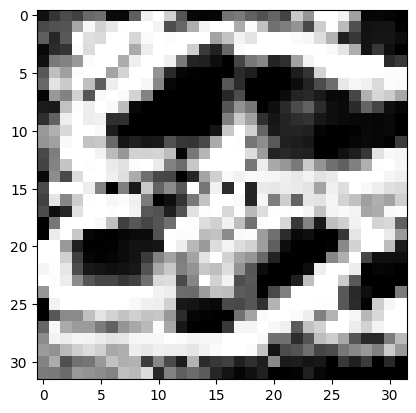

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# ----------- Quantized model inference -------------
interpreter = tf.lite.Interpreter(model_path="lenet5_mnist.tflite")
interpreter.allocate_tensors()
in_scale, in_zero_point = interpreter.get_input_details()[0]["quantization"]
# ---------- END Quantized model inference -----------
# --------- NOT Quantized model inference ------------
"""
model = tf.keras.models.load_model("lenet5.keras", custom_objects={"Lenet": Lenet})
in_zero_point = 128
in_scale = 0.003921568859368563
"""
# -------- END NOT Quantized model inference ---------

input_mask = tf.Variable(tf.ones((1, 32, 32, 1)))
coords = [(15,9),(15,10),(15,11),(15,12),(15,13),(15,14),(15,15),(15,16),(15,17),(15,18),(14,10),(13,11),(12,12),(11,18),(12,18),(13,18),(14,18),(16,18),(17,18),(18,18),(19,18)]
for coord in coords:
  input_mask[0, coord[0], coord[1], 0].assign(0)

# Maintain constant values as f32 for the given coordinates (containing patterns)
def apply_constants(image):
  coords = [(15,9),(15,10),(15,11),(15,12),(15,13),(15,14),(15,15),(15,16),(15,17),(15,18),(14,10),(13,11),(12,12),(11,18),(12,18),(13,18),(14,18),(16,18),(17,18),(18,18),(19,18)]
  hex_values = ['49', 'e4', '0a', 'd8', '7c', 'f7', '71', 'ae', '7e', '36', 'c8', '01', '87', 'f6', '5d', 'f6', '79', 'a6', '3a', 'f2', '7b']
  # Convert the hex values to a numerical representation (float32)
  float32_values = np.array([(np.int8(int(val, 16)) - in_zero_point) * in_scale for val in hex_values], dtype=np.float32)

  # Assign the float32 values to the specified coordinates
  for i, coord in enumerate(coords):
    input_image[0, coord[0], coord[1], 0].assign(float32_values[i])

# Maintain constant values as int8 for the given coordinates (containing patterns)
def apply_constants_int8(image):
  coords = [(15,9),(15,10),(15,11),(15,12),(15,13),(15,14),(15,15),(15,16),(15,17),(15,18),(14,10),(13,11),(12,12),(11,18),(12,18),(13,18),(14,18),(16,18),(17,18),(18,18),(19,18)]
  hex_values = ['49', 'e4', '0a', 'd8', '7c', 'f7', '71', 'ae', '7e', '36', 'c8', '01', '87', 'f6', '5d', 'f6', '79', 'a6', '3a', 'f2', '7b']
  for i, coord in enumerate(coords):
    input_image[0, coord[0], coord[1], 0].assign(np.int8(int(hex_values[i], 16)))

# Define the loss function: we want to minimize the variance of the predicted probabilities
def loss_function(image):
    logits = model(image)
    target = tf.ones_like(logits) * 0.1
    return tf.losses.cosine_similarity(target, logits)

#------------------------------------------------------------------------#

# Load the pre-trained model running the corresponding code snippet above

# Initialize a random image with the shape expected by the model (e.g., 224x224x3 for a typical image model)
input_image = tf.Variable(tf.random.uniform((1,32,32,1)), dtype=tf.float32)

# Define the optimizer
learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(.1, 5000, .1)
optimizer = tf.optimizers.Adam(learning_rate=learning_rate_schedule)

# Optimization loop
for step in range(8000):  # Number of optimization steps
    with tf.GradientTape() as tape:
      tape.watch(input_image)
      input_image.assign(tf.clip_by_value(input_image, 0.0, 1.0))
      apply_constants(input_image)
      loss = loss_function(input_image)
    # Compute gradients
    gradients = tape.gradient(loss, [input_image])
    # Apply gradients to the input image
    optimizer.apply_gradients(zip(gradients, [input_image]))
    if step % 200 == 0:
      print(f"Step {step}, Loss: {loss.numpy()} Probs: {model(input_image)}")

apply_constants(input_image)
print(model(input_image))

# numpy image as tensor
balanced_image = input_image.numpy().reshape((1, 32, 32, 1))
np.save("input_image_float32.npy", balanced_image)

# image as png image
tf.keras.utils.save_img('input_image_class_vis.png', balanced_image, color_mode='grayscale')

# image
# Normalize the image values to be between 0 and 255
balanced_image = balanced_image / in_scale + in_zero_point
# force patterns to maintain their value, no quantization needed
apply_constants_int8(balanced_image)
balanced_image = balanced_image.astype(np.int8)
print("Balanced Image:")
# Convert the numpy array to a PIL image
np.save("input_image_int8.npy", balanced_image)
pil_image = tf.keras.preprocessing.image.array_to_img(balanced_image)
# Display the image using matplotlib
plt.imshow(pil_image, cmap='gray')
plt.show()

# Convert the image to bytes
#balanced_image_int8 = balanced_image.astype(np.int8)
image_bytes = bytes(balanced_image)

# Convert the bytes to hex
image_hex = ' '.join(format(byte, '02x') for byte in image_bytes)

with open('input_image_class_visualization.hex', 'w') as f:
    f.write(image_hex)
